# Alphabet Soup Charity Funding Predictor -- Deep-Learning

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


* target variable: IS_SUCCESSFUL 
* feature variables: Everything Else

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number unique values in each column. 
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts= application_df['APPLICATION_TYPE'].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
list(application_counts[application_counts < 500].index)

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T15', 'T29', 'T17']

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts= application_df['CLASSIFICATION'].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2380        1
C4200        1
C1245        1
C1820        1
C1236        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts[classification_counts > 777]
# classification_counts[classification_counts < 1]
# list(classification_counts[classification_counts < 1883].index)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts[classification_counts < 1883].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
ask_amt_counts= application_df['ASK_AMT'].value_counts()
ask_amt_counts

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [11]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
ask_amounts_to_replace = list(ask_amt_counts[ask_amt_counts < 25398].index)

# Replace in dataframe
for amt in ask_amounts_to_replace:
    application_df['ASK_AMT'] = application_df['ASK_AMT'].replace(amt,"Other")

# Check to make sure binning was successful
application_df['ASK_AMT'].value_counts()

5000     25398
Other     8901
Name: ASK_AMT, dtype: int64

In [12]:
# ask_amt_counts[ask_amt_counts==1] # 8595 in this bucket
# ask_amt_counts[ask_amt_counts==2]  # 147 in this bucket
# ask_amt_counts[ask_amt_counts > 2]  # in this bucket there are 4 amounts asked for 3 times and 1 amount asked for 25398 times. 
# I could make this column 2 buskets, one bucket asking $5000.00 a number of 25398 times and 
#  one bucket of other amounts asked for 8746 times. I'll put a pin in this for now. 
# ask_amt_counts[ask_amt_counts<=3]

In [13]:
# application_df[application_df['APPLICATION_TYPE']== 'Other']
# application_df[application_df['CLASSIFICATION']== 'Other']
# application_df.head()
application_df.nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
STATUS                    2
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
ASK_AMT                   2
IS_SUCCESSFUL             2
dtype: int64

In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)
application_df

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_5000,ASK_AMT_Other
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
34295,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
34296,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
34297,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [15]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'], 1).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

### Set up a Neural Network Opitmizer to Determine the Best Model to Run

In [17]:
# # Create a method that creates a new Sequential model with hyperparameter options
# def create_model(hp):
#     nn_model = tf.keras.models.Sequential()

#     # Allow kerastuner to decide which activation function to use in hidden layers
#     activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
#     # Allow kerastuner to decide number of neurons in first layer
#     nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
#         min_value=1,
#         max_value=10,
#         step=2), activation=activation, input_dim=len(X_train[0])))

#     # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
#     for i in range(hp.Int('num_layers', 1, 6)):
#         nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
#             min_value=1,
#             max_value=10,
#             step=2),
#             activation=activation))
    
#     nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#     # Compile the model
#     nn_model.compile(loss="binary_crossentropy", optimizer='adagrad', metrics=["accuracy"])
    
#     return nn_model

In [18]:
# # Import the kerastuner library
# import kerastuner as kt

# tuner = kt.Hyperband(
#     create_model,
#     objective="accuracy",
#     max_epochs=20,
#     hyperband_iterations=2)

In [19]:
# # Run the kerastuner search for best hyperparameters
# tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

In [20]:
# # Get best model hyperparameters
# best_hyper = tuner.get_best_hyperparameters(1)[0]
# best_hyper.values

In [21]:
# # Evaluate best model against full test data
# best_model = tuner.get_best_models(1)[0]
# model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [22]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 40
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 40
hidden_nodes_layer4 = 40
hidden_nodes_layer5 = 40
hidden_nodes_layer6 = 40
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
tf.keras.layers.Dense(units=hidden_nodes_layer1,input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh",))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                1800      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_4 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_5 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4

In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
#  Create a callback
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback which saves the weights for every 5 epochs
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)


In [25]:
# Train the model
fit_model= nn.fit(X_train_scaled, y_train, epochs=100, verbose=1, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5706 - accuracy: 0.7236
Epoch 2/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5568 - accuracy: 0.7315
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5528 - accuracy: 0.7315
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5504 - accuracy: 0.7325
Epoch 5/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5485 - accuracy: 0.7337
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5466 - accuracy: 0.7357
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5460 - accuracy: 0.7345
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5453 - accuracy: 0.7366
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5444 - accuracy: 0.7360
Epoch 10/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5438 - accura

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5576 - accuracy: 0.7241
Loss: 0.5575597286224365, Accuracy: 0.7240816354751587


In [27]:
# Export our model to HDF5 file.
nn.save('AlphabetSoupCharity.h5')

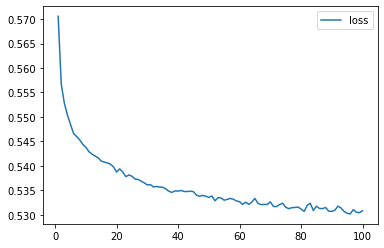

In [28]:
# Create a DataFrame containing training history.
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs.
history_df.index += 1

# Plot the loss.
history_df.plot(y="loss");

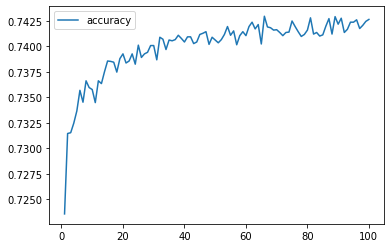

In [29]:

# Plot the accuracy.
history_df.plot(y="accuracy");